In [ ]:
## OpenSoundscape RIBBIT tutorial
# http://opensoundscape.org/en/latest/tutorials/RIBBIT_pulse_rate_demo.html

In [ ]:
## Setup 

In [1]:
# suppress warnings
import warnings
warnings.simplefilter('ignore')

#import packages
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt

#local imports from opensoundscape
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram
from opensoundscape.ribbit import ribbit

# create big visuals
plt.rcParams['figure.figsize']=[15,8]

In [2]:
## Download audio files 

In [4]:
## Load audio clip from file 

In [18]:
audio_path = np.sort(glob('./test_gopher_audio/*'))[0]

#load the audio file into an OpenSoundscape Audio object
audio = Audio.from_file(audio_path)

#trim the audio to cut out person
audio = audio.trim(3,6)

#create a Spectrogram object
spectrogram = Spectrogram.from_audio(audio)

/Users/mayalapp/opt/anaconda3/envs/opensoundscape047/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


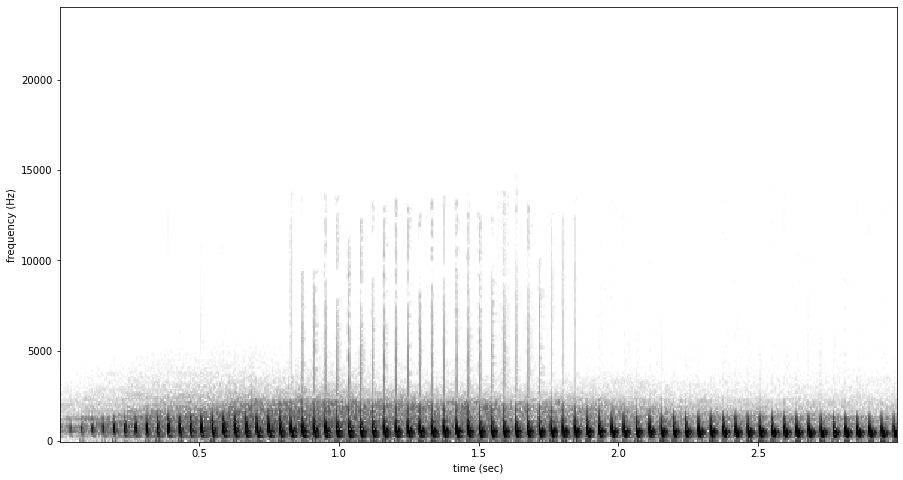

In [19]:
# view spectrogram 
spectrogram.plot()


In [7]:
## Set parameters 

In [20]:
# minimum and maximum rate of pulsing (pulses per second) to search for
pulse_rate_range = [20,30]

# look for a vocalization in the range of 1000-2000 Hz
signal_band = [200,1000]

# subtract the amplitude signal from these frequency ranges
noise_bands = [ [0,50], [1500,20000]]

#divides the signal into segments this many seconds long, analyzes each independently
window_length = 2 #(seconds)

#if True, it will show the power spectrum plot for each audio segment
show_plots = True

spectrogram of 10 second file with Great Plains Toad at the beginning


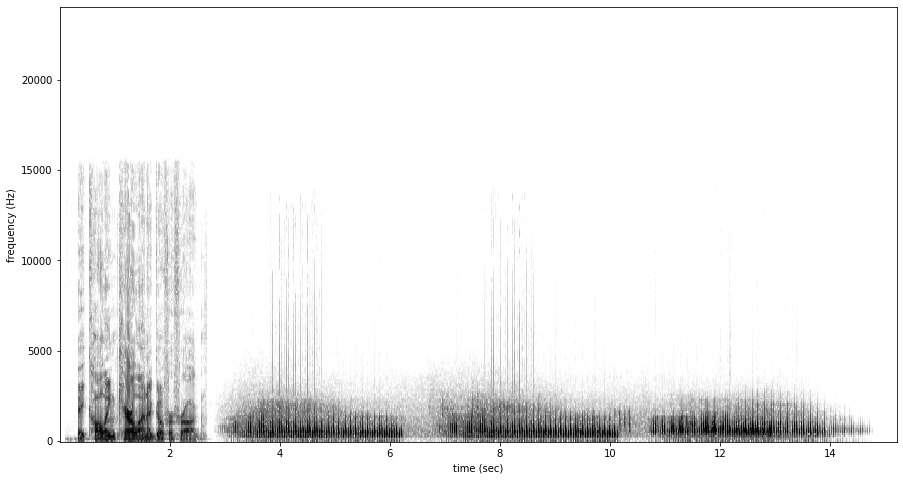

Text(0.5, 1.0, 'RIBBIT scores for 10 second file with Great Plains Toad at the beginning')

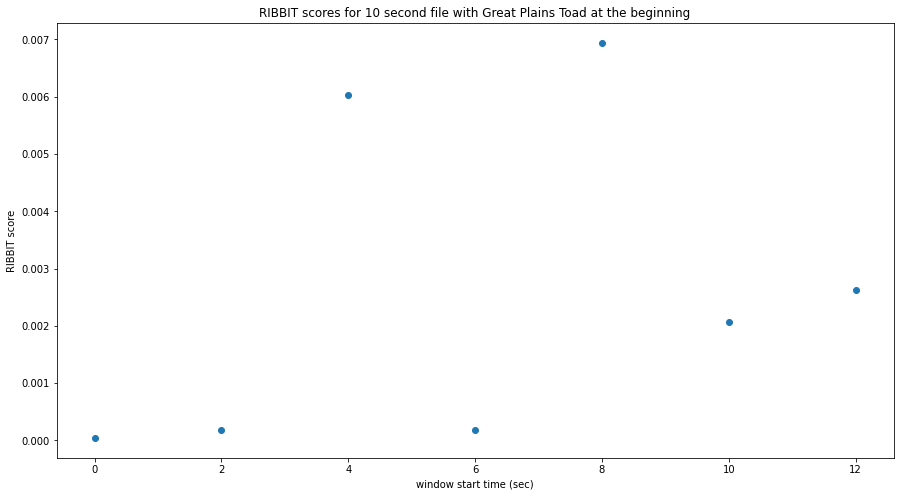

In [21]:
#get the audio file path
audio_path = np.sort(glob('./test_gopher_audio/*'))[0]

#make the spectrogram
spec = Spectrogram.from_audio(audio.from_file(audio_path))

#run RIBBIT
scores, times =  ribbit(
                    spec,
                    pulse_rate_range=pulse_rate_range,
                    signal_band=signal_band,
                    window_len=window_length,
                    noise_bands=noise_bands,
                    plot=False)


#show the spectrogram
print('spectrogram of 10 second file with Great Plains Toad at the beginning')
spec.plot()

# plot the score vs time of each window
plt.scatter(times,scores)
plt.xlabel('window start time (sec)')
plt.ylabel('RIBBIT score')
plt.title('RIBBIT scores for 10 second file with Great Plains Toad at the beginning')

#?????? ribbit score graph doesn't match. also why are there scores past 10 sec? 

In [21]:
## analyzing set of files

In [22]:
# set up a dataframe for storing files' scores and labels
df = pd.DataFrame(index = glob('./test_gopher_audio/*'),columns=['score','label'])

# label is 1 if the file contains a Great Plains Toad vocalization, and 0 if it does not
df['label'] = [1 if 'Rana' in f else 0 for f in df.index]

# calculate RIBBIT scores
for path in df.index:

    #make the spectrogram
    spec = Spectrogram.from_audio(audio.from_file(path))

    #run RIBBIT
    scores, times =  ribbit(
                        spec,
                        pulse_rate_range=pulse_rate_range,
                        signal_band=signal_band,
                        window_len=window_length,
                        noise_bands=noise_bands,
                        plot=False)

    # use the maximum RIBBIT score from any window as the score for this file
    # multiply the score by 10,000 to make it easier to read
    df.at[path,'score'] = max(scores) * 10000

print("Files sorted by score, from highest to lowest:")
df.sort_values(by='score',ascending=False)

/Users/mayalapp/opt/anaconda3/envs/opensoundscape047/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Files sorted by score, from highest to lowest:


,score,label
./test_gopher_audio/Rana capito - Gopher frog.mp3,69.426484,1
./test_gopher_audio/pops1.mp3,8.083275,0
./test_gopher_audio/water.mp3,0.829255,0
./test_gopher_audio/gpt1.mp3,0.098452,0
./test_gopher_audio/gpt2.mp3,0.087991,0
./test_gopher_audio/negative6.mp3,0.016574,0
./test_gopher_audio/negative5.mp3,0.015351,0
./test_gopher_audio/silent.mp3,0.0,0
